In [22]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [8]:
import numpy as np

all_data = {}

all_data[0] = np.loadtxt('data/all_vals_1.csv', delimiter=',')
all_data[1] = np.loadtxt('data/all_vals_2.csv', delimiter=',')
all_data[2] = np.loadtxt('data/all_vals_3.csv', delimiter=',')

In [9]:
z_all = []
for i in all_data:
    z_all.append(np.reshape(all_data[i].transpose()[2], (10,25)))
    

In [10]:
z = np.mean(np.array(z_all),0)
z2 = np.mean(np.array(z_all),1)

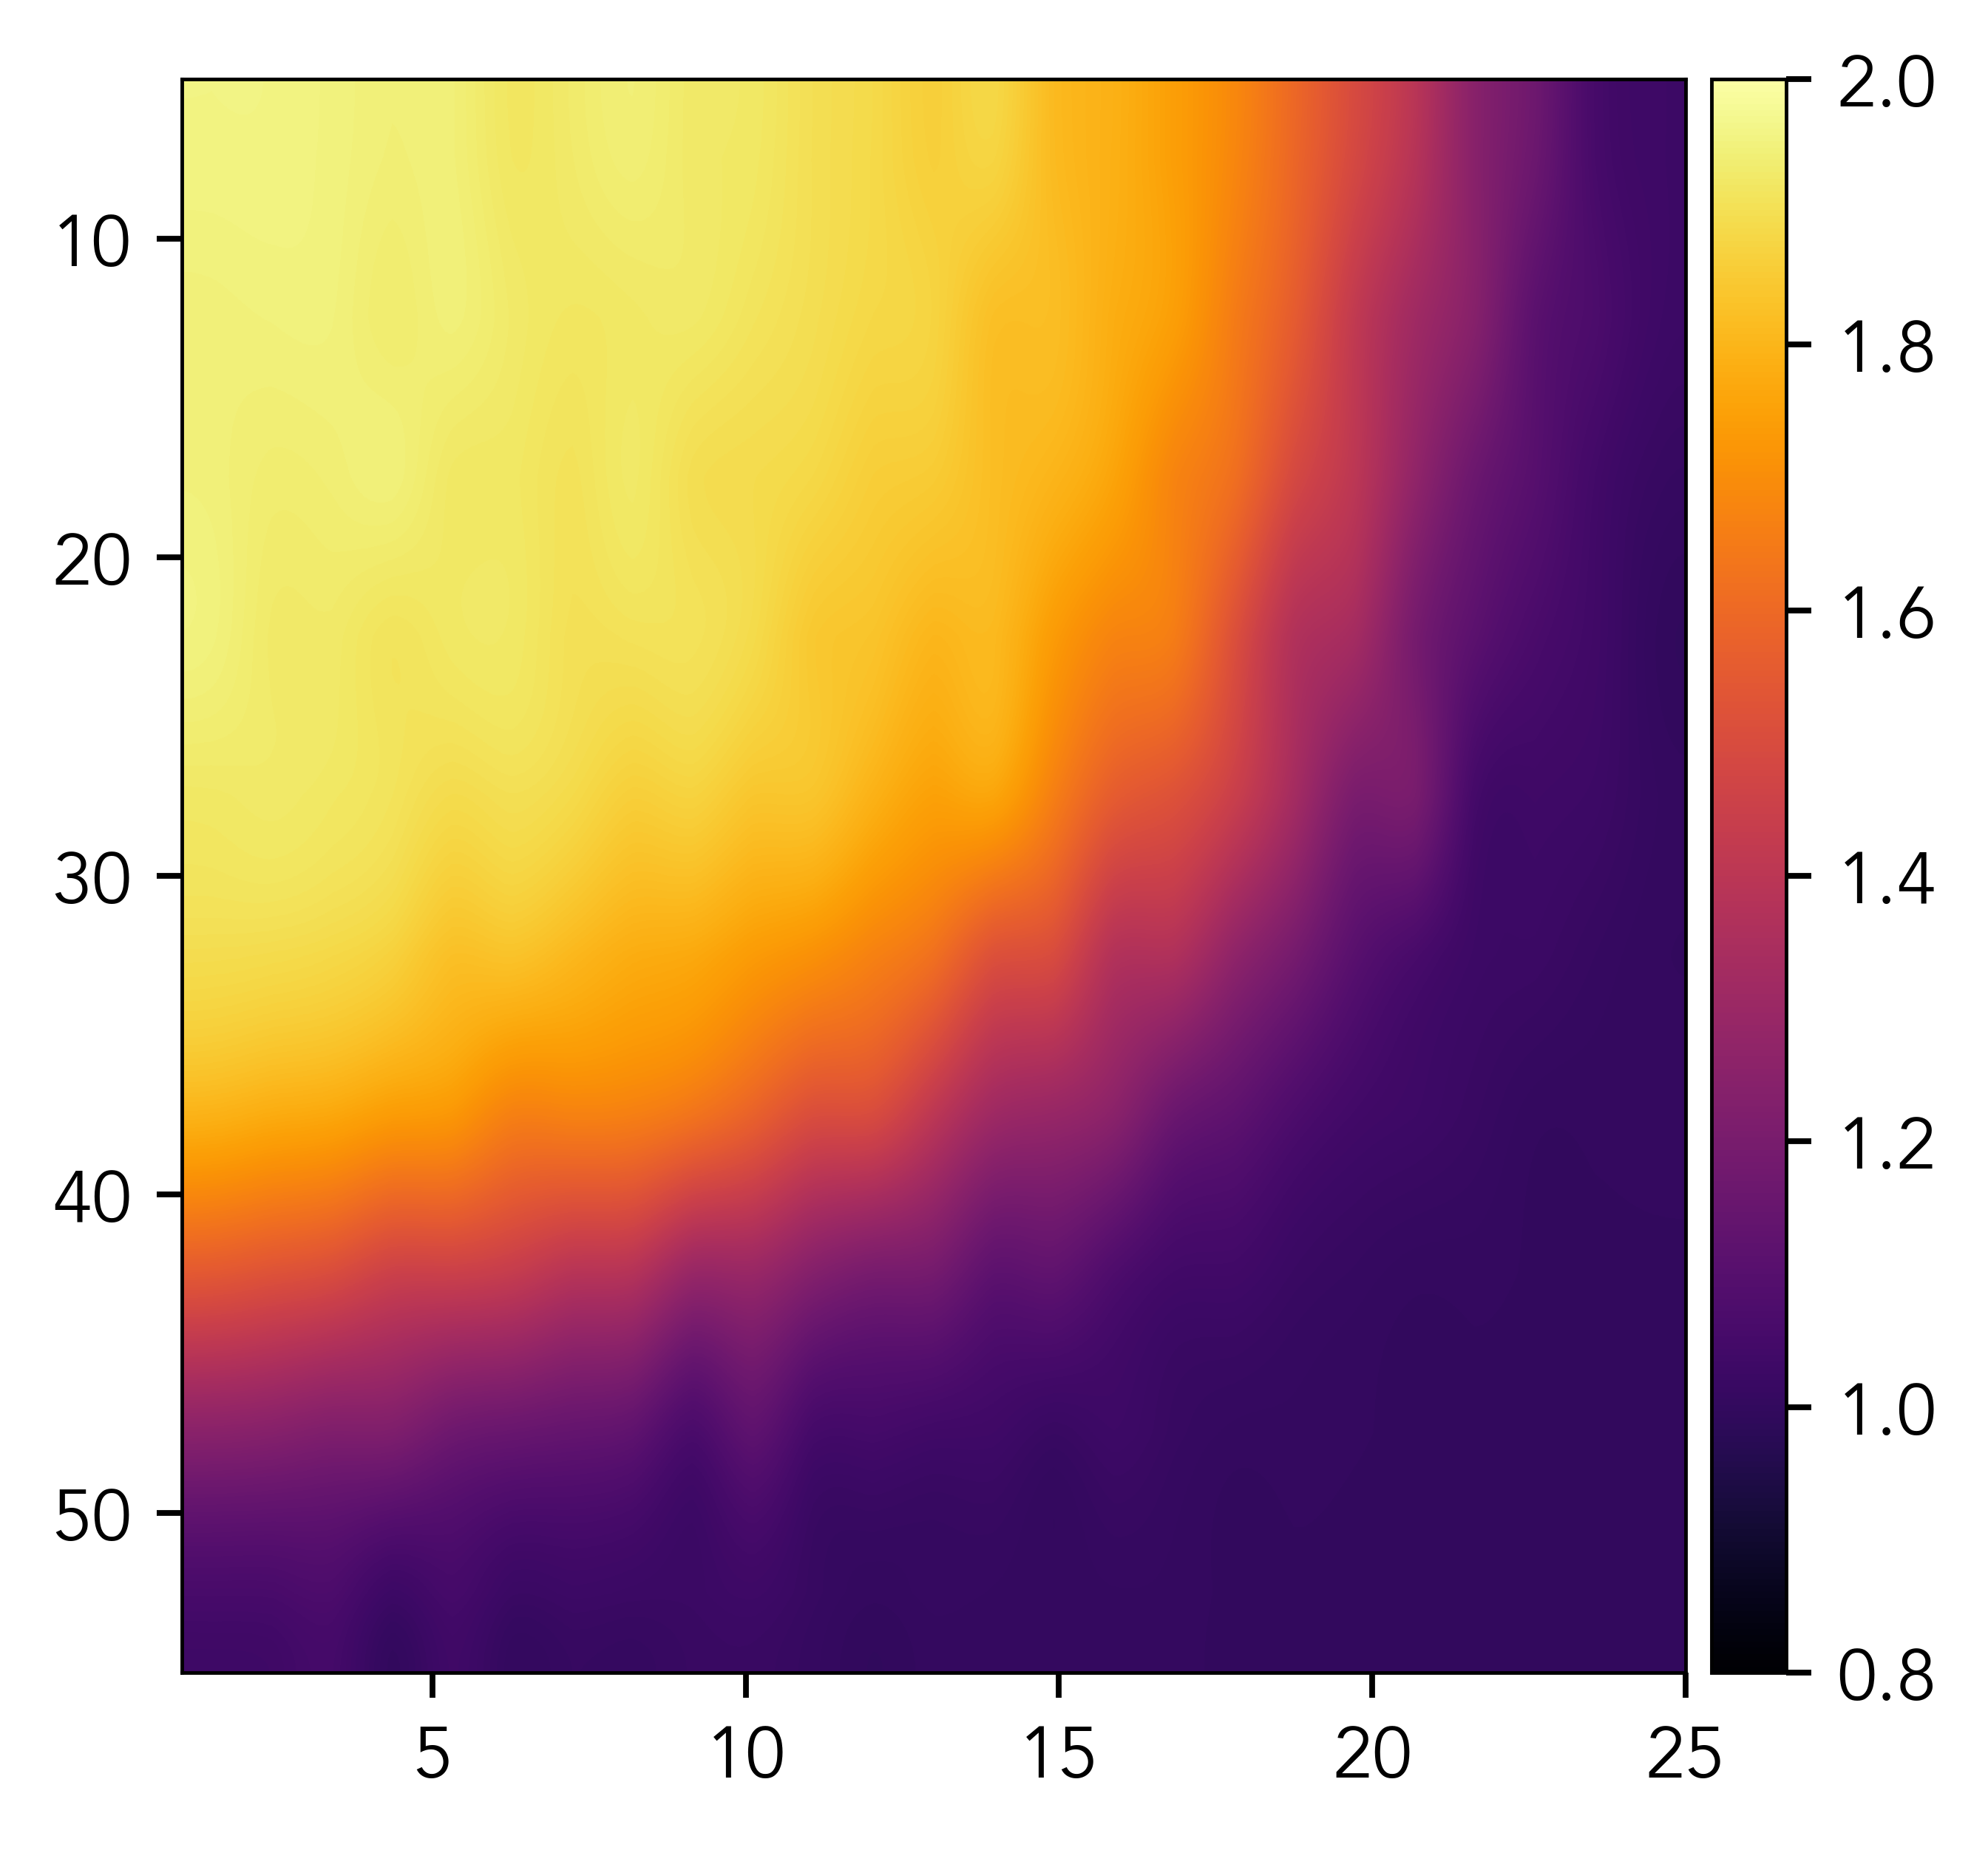

In [21]:
fig, ax = plt.subplots(figsize=(4,4), dpi=350)

c = ax.imshow(
    z, cmap='inferno', interpolation='spline16',
    extent=[1,25,55,5],
    vmin=0.8, vmax=2,
    aspect='auto'     # ← important fix
)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(c, cax=cax)
plt.savefig('figures/binding_landscape.pdf')

### Binding isotherms
The tow figures below are not actually inccluded in the paper but are the simple isotherms extracted from this binding landscape in the sequence-specific (motif_only_binding_curve.pdf) or chemically-specific (chemical_specificity_only) limits.

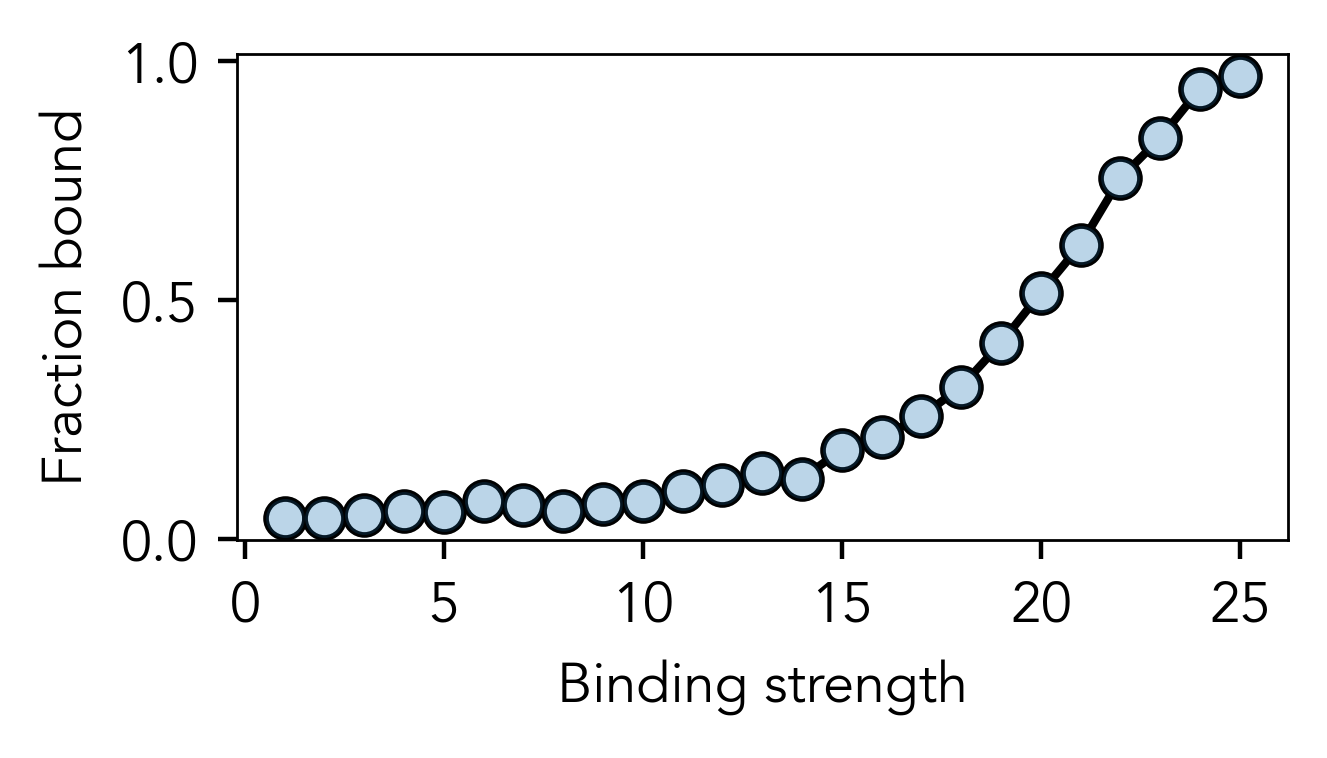

In [15]:
figure(num=None, figsize=(3.5, 2), dpi=200, facecolor='w', edgecolor='k')
ax = plt.gca()


plt.plot(x, 1-(z[0]-1),'-', linewidth=1.5, color='k')
plt.plot(x, 1-(z[0]-1),'o-',markersize=7, linewidth=0, markeredgecolor='k', color='w')
plt.plot(x, 1-(z[0]-1),'o-',markersize=7, linewidth=0, markeredgecolor='k', alpha=0.3)
plt.xlabel('Binding strength')
plt.ylabel('Fraction bound')

plt.tight_layout()
plt.savefig('figures/motif_only_binding_curve.pdf')


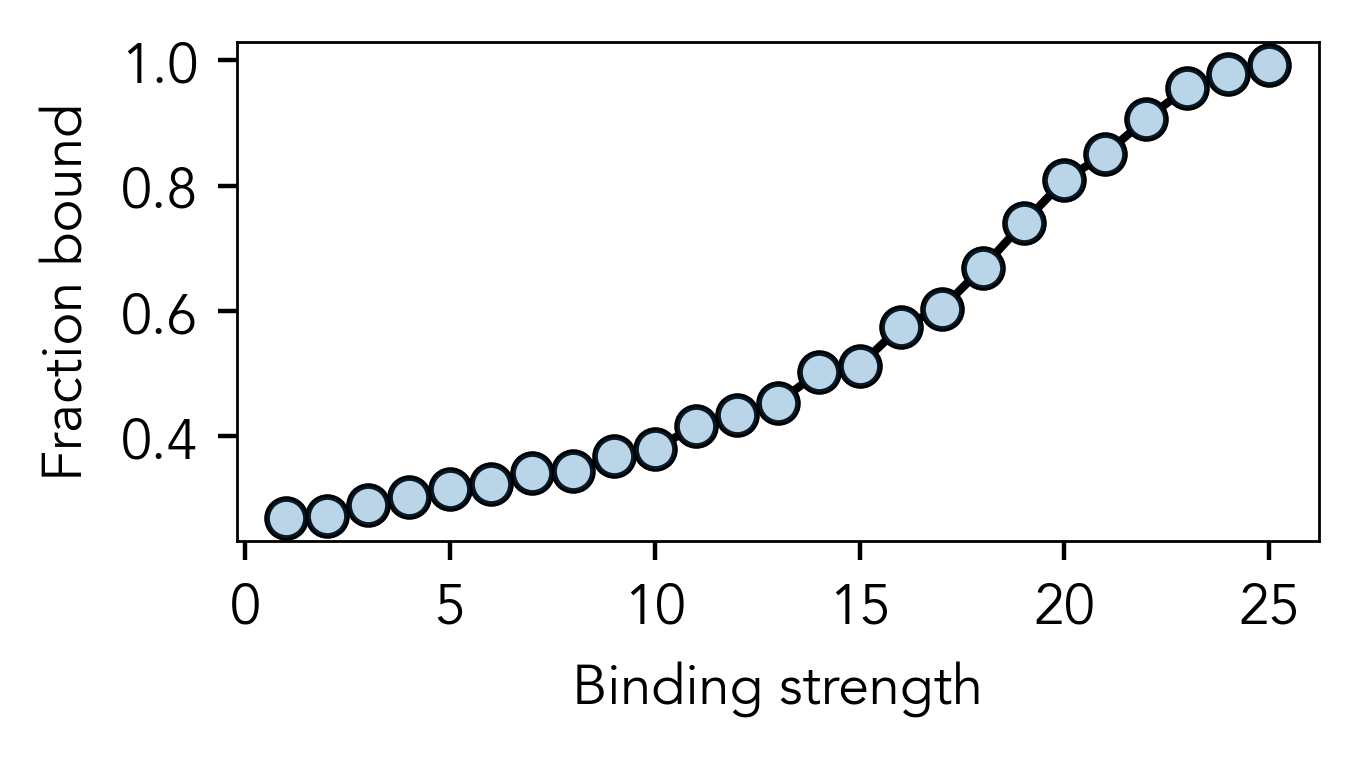

In [14]:
figure(num=None, figsize=(3.5, 2), dpi=200, facecolor='w', edgecolor='k')
ax = plt.gca()


plt.plot(x, 1-(z2[0]-1),'-', linewidth=1.5, color='k')
plt.plot(x, 1-(z2[0]-1),'o-',markersize=7, linewidth=0, markeredgecolor='k', color='w')
plt.plot(x, 1-(z2[0]-1),'o-',markersize=7, linewidth=0, markeredgecolor='k', alpha=0.3)
plt.xlabel('Binding strength')
plt.ylabel('Fraction bound')

plt.tight_layout()
plt.savefig('figures/chemical_specificity_only.pdf')


## PIMMS binding trajectory

In [26]:
with open('data//M_35_X_11/extra_sims/CLUSTERS.dat') as fh:
    c = fh.readlines()

In [27]:
bound_state = []
for i in c:
    if len(i.strip().split()) == 2:
        bound_state.append(1)
    else:
        bound_state.append(0)
        

0.5182461873638344


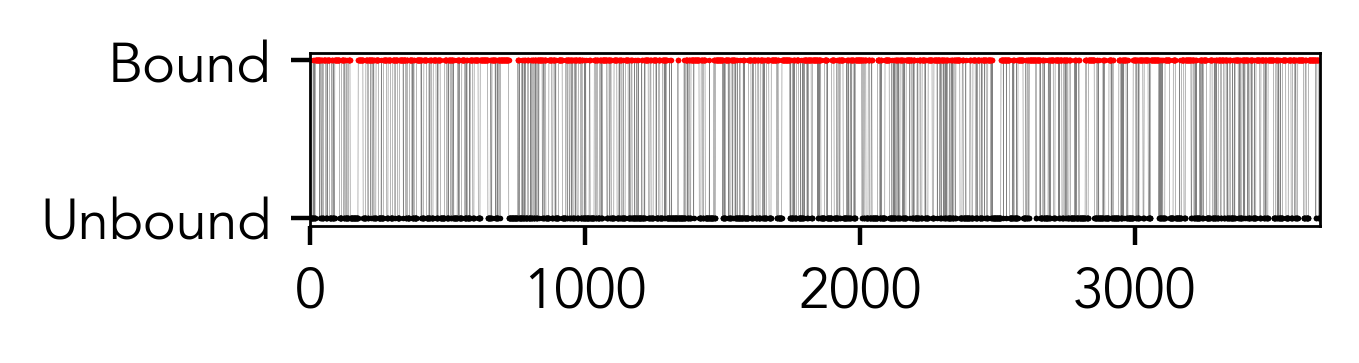

In [28]:
figure(num=None, figsize=(3.5, 1), dpi=200, facecolor='w', edgecolor='k')
plt.plot(bound_state,'grey',linewidth=0.1)
idx=0
bound_count = 0
for i in bound_state:
    if i ==1:
        plt.plot(idx,1,'or',ms=1, mec='None')
        bound_count = bound_count + 1
    else:
        plt.plot(idx,0,'ok', ms=1,mec='None')
    idx = idx + 1
    
plt.xlim([0,len(bound_state)])    
plt.yticks([0,1],['Unbound','Bound'])
print(bound_count/len(bound_state))
plt.tight_layout()
plt.savefig('figures/trajectory.pdf')
        